In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df= pd.read_feather('Dev1_sample.feather')

In [3]:
#Removing columns with more than 80% null values, to reduce dimensions of the dataframe.
train=train_df.dropna(axis=1, thresh=int(0.80*len(train_df)))

In [4]:
train_prime= train.copy()

In [5]:
#train['target'].isnull().sum()

### Exploring the data

In [6]:
#Categorical variables
train.select_dtypes([object])

,customer_ID,S_2,D_63,D_64
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,CR,O
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,CR,O
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,CR,O
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,CR,O
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,CR,O
...,...,...,...,...
1105145,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-11-17,CO,U
1105146,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-12-11,CO,R
1105147,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-01-25,CO,R
1105148,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-02-15,CO,R


In [7]:
train['D_63'].unique()

array(['CR', 'CO', 'CL', 'XL', 'XZ', 'XM'], dtype=object)

In [8]:
train['D_64'].unique()

array(['O', None, 'R', 'U', '-1'], dtype=object)

In [9]:
#missing values
train.isnull().sum()

customer_ID        0
S_2                0
P_2             9335
D_39               0
B_1                0
               ...  
D_141          20114
D_143          20114
D_144           8216
D_145          20114
target             0
Length: 157, dtype: int64

In [10]:
train.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,B_4,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
count,1.095815e+06,1.105150e+06,1.105150e+06,1.104744e+06,1.105150e+06,900554.000000,1.104744e+06,1.104744e+06,1.051343e+06,1.105150e+06,...,1.085036e+06,1.096512e+06,1.105150e+06,1.085036e+06,1.096955e+06,1.085036e+06,1.085036e+06,1.096934e+06,1.085036e+06,1.105150e+06
mean,6.564731e-01,1.527305e-01,1.252089e-01,6.209124e-01,7.874763e-02,0.226824,5.923205e-02,1.334537e-01,1.184914e-01,1.734055e-01,...,1.030221e-01,4.587316e-02,5.764523e-03,1.799706e-01,2.694067e-02,1.654565e-01,1.798366e-01,5.190807e-02,6.288390e-02,2.487219e-01
std,2.445148e-01,2.703338e-01,2.139131e-01,4.016585e-01,2.256824e-01,0.194997,2.014494e-01,2.366418e-01,2.212389e-01,2.237965e-01,...,2.948454e-01,1.713057e-01,2.781149e-02,3.799573e-01,1.465352e-01,3.490599e-01,3.798358e-01,1.808364e-01,1.947719e-01,4.322725e-01
min,-4.403368e-01,1.228086e-08,-7.780668e-01,5.485064e-08,2.058457e-09,-0.361831,5.566545e-10,6.285293e-09,5.153088e-10,2.279492e-08,...,2.759560e-08,1.243154e-09,2.291966e-09,3.365946e-08,1.242527e-08,1.943759e-08,1.060428e-08,1.248703e-08,5.484145e-09,0.000000e+00
25%,4.810852e-01,4.525048e-03,8.834796e-03,1.046251e-01,2.890753e-03,0.127392,2.869631e-03,5.219055e-03,3.822912e-03,2.770787e-02,...,2.776239e-03,2.712699e-03,2.503227e-03,3.031239e-03,2.547210e-03,3.033064e-03,3.035514e-03,2.745678e-03,3.028325e-03,0.000000e+00
50%,6.938416e-01,9.047626e-03,3.120162e-02,8.143006e-01,5.785699e-03,0.164075,5.738517e-03,9.777933e-03,7.664993e-03,8.246759e-02,...,5.549777e-03,5.441262e-03,5.001904e-03,6.059983e-03,5.102816e-03,6.057676e-03,6.060623e-03,5.500062e-03,6.052368e-03,0.000000e+00
75%,8.651728e-01,2.362644e-01,1.269951e-01,1.002384e+00,8.662860e-03,0.259160,8.610545e-03,1.559394e-01,1.319399e-01,2.392788e-01,...,8.330705e-03,8.161231e-03,7.501578e-03,9.086230e-03,7.664515e-03,9.092203e-03,9.085111e-03,8.261110e-03,9.087380e-03,0.000000e+00
max,1.010000e+00,5.389619e+00,1.324053e+00,1.010000e+00,3.006102e+00,5.482888,7.139698e+00,1.625262e+00,4.005466e+00,3.681162e+00,...,1.412445e+00,1.509989e+00,1.009983e+00,1.010000e+00,1.010000e+00,1.252589e+00,1.010000e+00,1.343331e+00,4.282032e+00,1.000000e+00


#### columns

In [11]:
all_columns=[col for col in list(train.columns) if col not in ['customer_ID', 'S_2', 'target']]
cat_columns=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
num_columns=[col for col in all_columns if col not in cat_columns]

# Columns to perform one hot encoding
one_hot_columns=['D_63', 'D_64']

In [12]:
train[['D_63','D_64']].isnull().sum()

D_63        0
D_64    43329
dtype: int64

In [13]:
train.shape

(1105150, 157)

### One Hot Encoding

In [14]:
#One-Hot Encoding: Converting categorical features to numerical features
dummies= pd.get_dummies(train[['D_63','D_64']]) 
dummies

,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
0,0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1105145,0,1,0,0,0,0,0,0,0,1
1105146,0,1,0,0,0,0,0,0,1,0
1105147,0,1,0,0,0,0,0,0,1,0
1105148,0,1,0,0,0,0,0,0,1,0


In [15]:
# Removing D_64_-1 as it is not categorical
dummies = dummies.drop(columns=['D_64_-1'])

In [16]:
# Concatenating it with the train data
encoded_train_data = pd.concat([train,dummies], axis = 1)

In [17]:
encoded_train_data

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,target,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_O,D_64_R,D_64_U
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0,0,0,1,0,0,0,1,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0,0,0,1,0,0,0,1,0,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0,0,0,1,0,0,0,1,0,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0,0,0,1,0,0,0,1,0,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105145,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-11-17,0.787996,0.004490,0.022121,1.001141,0.003452,0.472817,0.004425,0.044108,...,1,0,1,0,0,0,0,0,0,1
1105146,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-12-11,0.789941,0.001332,0.029211,1.005610,0.002905,0.494445,0.001444,0.039642,...,1,0,1,0,0,0,0,0,1,0
1105147,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-01-25,0.787439,0.030946,0.015508,0.209527,0.008004,0.609371,0.008975,0.083690,...,1,0,1,0,0,0,0,0,1,0
1105148,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-02-15,0.754452,0.001509,0.025988,0.206945,0.009382,0.425783,0.007432,0.087275,...,1,0,1,0,0,0,0,0,1,0


In [18]:
encoded_train_data=encoded_train_data.drop(columns=['D_63','D_64']) 
#Dropping the encoded columns.

### Aggregating the features

In [19]:
train_num_agg=encoded_train_data.groupby("customer_ID")[num_columns].agg(['mean', 'std', 'min', 'max', 'last'])
train_num_agg.columns = ['_'.join(x) for x in train_num_agg.columns]

In [20]:
train_cat_agg = encoded_train_data.groupby("customer_ID")[dummies.columns].agg(['count', 'last', 'nunique'])
train_cat_agg.columns = ['_'.join(x) for x in train_cat_agg.columns]

In [21]:
train_concat = pd.concat([train_num_agg, train_cat_agg], axis=1)

In [22]:
train_concat

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_63_XZ_nunique,D_64_O_count,D_64_O_last,D_64_O_nunique,D_64_R_count,D_64_R_last,D_64_R_nunique,D_64_U_count,D_64_U_last,D_64_U_nunique
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.024194,0.868580,0.960384,0.934745,0.010704,0.024444,0.001082,0.091505,0.009119,...,1,13,1,1,13,0,1,13,0,1
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.444606,0.065085,0.328983,0.560474,0.477116,0.010394,0.014735,0.000467,0.038574,0.000467,...,1,13,0,1,13,1,2,13,0,1
0001812036f1558332e5c0880ecbad70b13a6f28ab04a8db6d83a26ef40aadb0,0.386107,0.031185,0.340604,0.431697,0.424076,0.117855,0.134075,0.000871,0.354380,0.240983,...,1,13,0,1,13,0,1,13,1,1
0002d381bdd8048d76719042cf1eb63caf53b636f8aacdba49365fd1ab7d0f36,0.998687,0.017098,0.943674,1.007809,1.004771,0.038912,0.113147,0.000209,0.414372,0.005387,...,1,13,1,1,13,0,1,13,0,1
0003b7891c49786441d138c01f55f1712df645989dcd2a83106ab4a229fee72d,0.947334,0.015302,0.928322,0.987283,0.963453,0.150307,0.235710,0.002359,0.795048,0.795048,...,1,13,1,1,13,0,1,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd765f1f5fa550f044acb297092807227f4742fa11bbdbbf67e0b6de7e01e6,0.698309,0.042694,0.626770,0.739763,0.727559,0.201084,0.175134,0.000767,0.445995,0.031348,...,1,13,0,1,13,1,1,13,0,1
fffdc0cf228085b4275b38ebe6eb915766af3fecb2ae28f6ffa70f4e22d7029f,0.964291,0.032537,0.886337,0.994921,0.980996,0.246970,0.199295,0.001412,0.591984,0.120805,...,1,13,1,1,13,0,1,13,0,1
fffe0f90c85547c9a30d49afdc0f501523e55eec15399d0f298b3892d819821a,0.223971,0.308144,-0.157739,0.540153,-0.024473,0.158920,0.249192,0.003741,0.652109,0.034101,...,1,13,0,1,13,0,1,13,1,1


### Target data


In [23]:
target = train[['customer_ID','target']]

In [24]:
target

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
...,...,...
1105145,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1
1105146,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1
1105147,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1
1105148,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [25]:
unique_target = target.drop_duplicates().copy()

In [26]:
unique_target

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
13,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0
26,0001812036f1558332e5c0880ecbad70b13a6f28ab04a8...,1
39,0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...,0
52,0003b7891c49786441d138c01f55f1712df645989dcd2a...,0
...,...,...
1105085,fffd765f1f5fa550f044acb297092807227f4742fa11bb...,0
1105098,fffdc0cf228085b4275b38ebe6eb915766af3fecb2ae28...,0
1105111,fffe0f90c85547c9a30d49afdc0f501523e55eec15399d...,1
1105124,fffe54257bf19fb370e388269bd04a4222c57400bfc9db...,0


In [27]:
train_agg = train_concat.merge(unique_target, on='customer_ID')

In [28]:
train_agg

,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,...,D_64_O_count,D_64_O_last,D_64_O_nunique,D_64_R_count,D_64_R_last,D_64_R_nunique,D_64_U_count,D_64_U_last,D_64_U_nunique,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.868580,0.960384,0.934745,0.010704,0.024444,0.001082,0.091505,...,13,1,1,13,0,1,13,0,1,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.444606,0.065085,0.328983,0.560474,0.477116,0.010394,0.014735,0.000467,0.038574,...,13,0,1,13,1,2,13,0,1,0
2,0001812036f1558332e5c0880ecbad70b13a6f28ab04a8...,0.386107,0.031185,0.340604,0.431697,0.424076,0.117855,0.134075,0.000871,0.354380,...,13,0,1,13,0,1,13,1,1,1
3,0002d381bdd8048d76719042cf1eb63caf53b636f8aacd...,0.998687,0.017098,0.943674,1.007809,1.004771,0.038912,0.113147,0.000209,0.414372,...,13,1,1,13,0,1,13,0,1,0
4,0003b7891c49786441d138c01f55f1712df645989dcd2a...,0.947334,0.015302,0.928322,0.987283,0.963453,0.150307,0.235710,0.002359,0.795048,...,13,1,1,13,0,1,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91778,fffd765f1f5fa550f044acb297092807227f4742fa11bb...,0.698309,0.042694,0.626770,0.739763,0.727559,0.201084,0.175134,0.000767,0.445995,...,13,0,1,13,1,1,13,0,1,0
91779,fffdc0cf228085b4275b38ebe6eb915766af3fecb2ae28...,0.964291,0.032537,0.886337,0.994921,0.980996,0.246970,0.199295,0.001412,0.591984,...,13,1,1,13,0,1,13,0,1,0
91780,fffe0f90c85547c9a30d49afdc0f501523e55eec15399d...,0.223971,0.308144,-0.157739,0.540153,-0.024473,0.158920,0.249192,0.003741,0.652109,...,13,0,1,13,0,1,13,1,1,1
91781,fffe54257bf19fb370e388269bd04a4222c57400bfc9db...,0.818487,0.023680,0.782524,0.859032,0.859032,0.186331,0.176923,0.000358,0.421163,...,13,1,1,13,0,1,13,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#Splitting the development sample as train and test samples.
train, test = train_test_split(train_agg,test_size=0.3, random_state=42)



X_train=train.drop(['target','customer_ID'],axis=1)
Y_train=train['target']
Y_train_prime=train[['customer_ID','target']] 

X_test=test.drop(['target','customer_ID'],axis=1)
Y_test=test['target']

X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

#Building the XGB model
import xgboost as xgb
xgb_instance = xgb.XGBClassifier()
model_for_feature_selection = xgb_instance.fit(X_train, Y_train)

#Printing feature Importances
feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
#print (feature_importance.to_string())

In [33]:
feature_importance

,Feature,Importance
4,P_2_last,0.139676
14,B_1_last,0.036772
99,B_9_last,0.018385
19,B_2_last,0.016487
129,B_11_last,0.012486
...,...,...
721,D_63_CL_last,0.000000
722,D_63_CL_nunique,0.000000
724,D_63_CO_last,0.000000
725,D_63_CO_nunique,0.000000


In [34]:
print (y_test1.shape)
print (y_test2.shape)

(13767,)
(13768,)


In [35]:
#type(feature_importance)
imp_features_select = feature_importance["Feature"][feature_importance.Importance > 0.005] #selecting imp features.
print(imp_features_select)

4       P_2_last
14      B_1_last
99      B_9_last
19      B_2_last
129    B_11_last
24      R_1_last
20      R_1_mean
40     D_44_mean
110     P_3_mean
50     D_45_mean
Name: Feature, dtype: object


In [36]:
#feature_importance.to_csv('feat1_withoutparams.csv')

### Building XGBoost model with params 300 trees, 0.5 as learning rate, maximum depth of trees is 4, uses 50% of observation to build each tree, uses 50% of features to build each tree, and assigns a weight of 5 to default observations


In [37]:
xgb_instance = xgb.XGBClassifier(n_estimators=300,
    learning_rate= 0.5,
    max_depth= 4,
    subsample= 0.5,
    colsample_bytree= 0.5,
    scale_pos_weight= 5)
model_for_feature_selection = xgb_instance.fit(X_train, Y_train)

#Printing feature Importances
feature_importance_1 = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance_1 = pd.DataFrame(feature_importance)
feature_importance_1.sort_values("Importance", inplace=True,ascending=False)
#print (feature_importance_1.to_string())

In [38]:
imp_features_select_params = feature_importance_1["Feature"][feature_importance_1.Importance > 0.005] #selecting imp features.
print(imp_features_select_params)

4       P_2_last
14      B_1_last
99      B_9_last
19      B_2_last
129    B_11_last
24      R_1_last
20      R_1_mean
40     D_44_mean
110     P_3_mean
50     D_45_mean
Name: Feature, dtype: object


In [39]:
#feature_importance_1.to_csv('feat_withparams.csv')

In [40]:
#result=imp_features_select_params.equals(imp_features_select)
#print(result)

X_train= X_train[imp_features_select] #Using only the features that have imp score of >0.5%
X_test1= X_test1[imp_features_select]
X_test2= X_test2[imp_features_select]

In [41]:
#assert X_test1.shape[0] == y_test1.shape[0]
#assert X_test2.shape[0] == y_test2.shape[0]
#y_test1["target"]

In [42]:
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate", "Subsample", "%Features", "Weight of Default", "AUC Train", "AUC Test 1", "AUC Test 2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for Sub_Sample in [0.5, 0.8]:
        for percent_feat in [0.5,1]:
            for WD in [1,5,10]:
                xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR, subsample= Sub_Sample, colsample_bytree= percent_feat, scale_pos_weight= WD)
                model = xgb_instance.fit(X_train, Y_train)

                table.loc[row,"Num Trees"] = num_trees
                table.loc[row,"Learning Rate"] = LR
                table.loc[row,"Subsample"] = Sub_Sample
                table.loc[row,"% Features"] = percent_feat
                table.loc[row,"Weight of Default"]= WD
                table.loc[row,"AUC Train"] = roc_auc_score(train['target'], model.predict_proba(X_train)[:,1])
                table.loc[row,"AUC Test 1"] = roc_auc_score(y_test1, model.predict_proba(X_test1)[:,1])
                table.loc[row,"AUC Test 2"] = roc_auc_score(y_test2, model.predict_proba(X_test2)[:,1])
                row = row + 1

#table.to_csv("results_XGB.csv")

### Plotting the ROC curve for Train Vs test1 and test2.

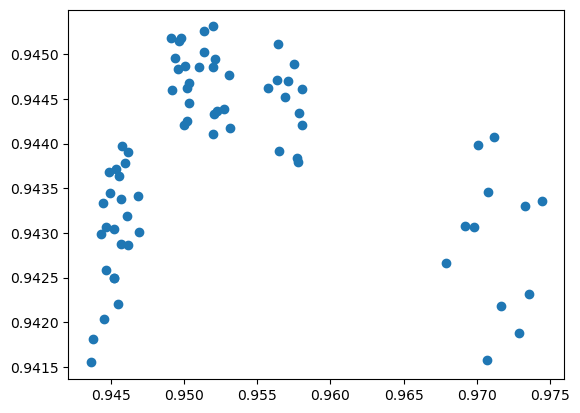

In [43]:
import matplotlib.pyplot as plt
#table.plot(x="AUC Train", y="AUC Test", "ro")
plt.scatter(table["AUC Train"], table["AUC Test 1"])
#plt.scatter(table["AUC Train"], table["AUC Test 2"])

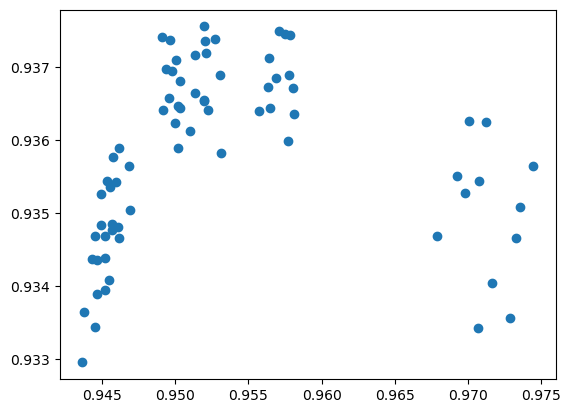

In [44]:
plt.scatter(table["AUC Train"], table["AUC Test 2"])

## Neural Network model

### Data Processing

#### Outlier treatment

In [45]:
X_train.head(5)

,P_2_last,B_1_last,B_9_last,B_2_last,B_11_last,R_1_last,R_1_mean,D_44_mean,P_3_mean,D_45_mean
50564,0.153392,0.204119,0.649452,0.141195,0.189793,1.258165,0.409242,0.619433,0.606835,0.396055
43768,0.954207,0.002962,0.005143,0.817080,0.002754,0.009460,0.004993,0.004590,0.769820,0.357395
81369,0.340743,0.088124,0.104810,0.814702,0.053973,1.007487,0.633742,0.065210,NaN,0.004268
2511,0.853313,0.008074,0.007529,0.815145,0.004892,0.007811,0.005897,0.004625,0.756117,0.155600
49254,0.660944,0.016062,0.009103,0.811821,0.009767,0.001162,0.465736,0.015532,0.504399,0.099447


In [46]:
#Outlier treatment
percentiles_1st = X_train.quantile(0.01)
percentiles_99th = X_train.quantile(0.99)

t1_percentiles_1st = X_test1.quantile(0.01)
t1_percentiles_99th = X_test1.quantile(0.99)

t2_percentiles_1st = X_test2.quantile(0.01)
t2_percentiles_99th = X_test2.quantile(0.99)

for col in imp_features_select:
    X_train[col] = np.clip(X_train[col], percentiles_1st[col], percentiles_99th[col])

for col in imp_features_select:
    X_test1[col] = np.clip(X_test1[col], t1_percentiles_1st[col], t1_percentiles_99th[col])
    
for col in imp_features_select:
    X_test2[col] = np.clip(X_test2[col], t2_percentiles_1st[col], t2_percentiles_99th[col])    



#### Feature scaling / Normalization

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

N_X_train_data=scaler.fit_transform(X_train)
N_X_train = pd.DataFrame(N_X_train_data, columns=X_train.columns)

N_X_test1_data=scaler.fit_transform(X_test1)
N_X_test1 = pd.DataFrame(N_X_test1_data, columns=X_test1.columns)

N_X_test2_data=scaler.fit_transform(X_test2)
N_X_test2 = pd.DataFrame(N_X_test2_data, columns=X_test2.columns)

#### Replacing NaN values with zeroes in train and test samples.

In [48]:
N_X_train.fillna(0, inplace=True)
N_X_test1.fillna(0, inplace=True)
N_X_test2.fillna(0, inplace=True)

In [49]:
#pip install tensorflow
N_X_train.head(5)

,P_2_last,B_1_last,B_9_last,B_2_last,B_11_last,R_1_last,R_1_mean,D_44_mean,P_3_mean,D_45_mean
0,-1.827023,0.283230,1.690295,-1.090741,0.286748,4.238399,2.268385,2.638390,0.082437,0.682174
1,1.201179,-0.600329,-0.736421,0.550273,-0.551728,-0.357589,-0.497363,-0.579246,1.512370,0.517376
2,-1.118574,-0.226267,-0.361034,0.544497,-0.322120,3.315751,3.804342,-0.262006,0.000000,-0.981891
3,0.819658,-0.577877,-0.727433,0.545573,-0.542143,-0.363658,-0.491181,-0.579064,1.392144,-0.342816
4,0.092232,-0.542787,-0.721505,0.537503,-0.520292,-0.388131,2.654896,-0.521984,-0.816271,-0.582178


In [50]:
#pip install keras

In [51]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [49]:
table = pd.DataFrame(columns = ["#HL","Num Nodes", "Activation Function","Dropout", "Batch Size", "AUC Train", "AUC Test 1","AUC Test 2"])

row = 0
for num_nodes in [4,6]:
  for activation in ['relu', 'tanh']:
    for batch_size in [100, 10000]:
        for dropout in [0.5, 1]:
            classifier = Sequential()
            if dropout ==0.5:
                classifier.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',activation = activation))
                classifier.add(Dropout(rate=0.5))#HL1
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))
                classifier.add(Dropout(rate=0.5))#HL2
            else:
                classifier.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',activation = activation))#HL1
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))#HL2
            
            
            classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation = 'sigmoid'))
            classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])
            classifier.fit(N_X_train,Y_train,batch_size=batch_size,epochs=20,verbose=0)

            #train_data = train.copy()
            #train_data["prediction"] = classifier.predict(X_train)
            prediction_train= classifier.predict(N_X_train)
            prediction_test1= classifier.predict(N_X_test1)
            prediction_test2= classifier.predict(N_X_test2)
            #test_data_1 = test.copy()
            #test_data["prediction"] = classifier.predict(X_test1)
            
            
            table.loc[row,"#HL"] = 2
            table.loc[row,"Num Nodes"] = num_nodes
            table.loc[row,"Activation Function"] = activation
            table.loc[row,"Dropout"]= dropout
            table.loc[row,"Batch Size"] = batch_size
            table.loc[row,"AUC Train"] = roc_auc_score(Y_train, prediction_train)
            table.loc[row,"AUC Test 1"] = roc_auc_score(y_test1, prediction_test1)
            table.loc[row,"AUC Test 2"] = roc_auc_score(y_test2, prediction_test2)

            row = row + 1
            
for num_nodes in [4,6]:
  for activation in ['relu', 'tanh']:
    for batch_size in [100, 10000]:
        for dropout in [0.5, 1]:
            classifier = Sequential()
            if dropout == 0.5:
                classifier.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',activation = activation))
                classifier.add(Dropout(rate=0.5))#HL1
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))
                classifier.add(Dropout(rate=0.5))#HL2
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))
                classifier.add(Dropout(rate=0.5))#HL3
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))
                classifier.add(Dropout(rate=0.5))#HL4
            else:
                classifier.add(Dense(units=num_nodes, kernel_initializer='glorot_uniform',activation = activation))#HL1
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))#HL2
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))#HL3
                classifier.add(Dense(units=num_nodes,kernel_initializer='glorot_uniform',activation = activation))#HL4
            
            
            classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation = 'sigmoid'))
            classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])
            classifier.fit(N_X_train,Y_train,batch_size=batch_size,epochs=20,verbose=0)

            #train_data = train.copy()
            #train_data["prediction"] = classifier.predict(X_train)
            prediction_train= classifier.predict(N_X_train)
            prediction_test1= classifier.predict(N_X_test1)
            prediction_test2= classifier.predict(N_X_test2)
            #test_data_1 = test.copy()
            #test_data["prediction"] = classifier.predict(X_test1)
            
            
            table.loc[row,"#HL"] = 4
            table.loc[row,"Num Nodes"] = num_nodes
            table.loc[row,"Activation Function"] = activation
            table.loc[row,"Dropout"]= dropout
            table.loc[row,"Batch Size"] = batch_size
            table.loc[row,"AUC Train"] = roc_auc_score(Y_train, prediction_train)
            table.loc[row,"AUC Test 1"] = roc_auc_score(y_test1, prediction_test1)
            table.loc[row,"AUC Test 2"] = roc_auc_score(y_test2, prediction_test2)

            row = row + 1
            
            
            

#table.to_csv("results_NN_allLayers.csv")

431/431 [==============================] - 1s 1ms/step


### Running the best model from the top XGB and NN models and predicitng the probability of default.


In [52]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate= 0.01,
    subsample= 0.8,
    colsample_bytree= 1,
    scale_pos_weight= 1)
xgb_fit=xgb_model.fit(X_train, Y_train)

xgb_final_output = xgb_fit.predict_proba(X_train)

In [53]:
#Storing probability of default in a variable.
xgb_final_output_df=pd.DataFrame(xgb_final_output)
prob_default= xgb_final_output_df.iloc[:,1]
#type(prob_default)
prime_df= pd.concat([Y_train_prime,prob_default],axis=1)

In [54]:
train_prime

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,0.005497,0.009227,0.009123,0.003269,0.007329,0.000427,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,0.008261,0.007206,0.002409,0.006117,0.004516,0.003200,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,0.004848,0.006312,0.004462,0.003671,0.004946,0.008889,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105145,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-11-17,0.787996,0.004490,0.022121,1.001141,0.003452,0.472817,0.004425,0.044108,...,0.003746,0.005428,0.004869,1.000637,0.009325,0.941311,1.006727,0.004422,0.190753,1
1105146,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2017-12-11,0.789941,0.001332,0.029211,1.005610,0.002905,0.494445,0.001444,0.039642,...,0.008043,0.007864,0.008678,1.005625,0.003935,0.946908,1.004144,0.007122,0.185734,1
1105147,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-01-25,0.787439,0.030946,0.015508,0.209527,0.008004,0.609371,0.008975,0.083690,...,0.008995,0.003784,0.000633,1.009795,0.008908,0.941023,1.003074,0.007104,0.182622,1
1105148,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,2018-02-15,0.754452,0.001509,0.025988,0.206945,0.009382,0.425783,0.007432,0.087275,...,0.000847,0.008586,0.000244,1.004394,0.005160,0.941114,1.000731,0.004325,0.189733,1


In [55]:
balance_variables= [col for col in train_prime.columns if col.startswith('B_')]
spend_variables= [col for col in train_prime.columns if col.startswith('S_')]
#print(balance_variables)

### Filtering the dataset based on last 6 months of Data, November 2017 to April 2018.

In [56]:
date_column= 'S_2'
train_prime[date_column] = pd.to_datetime(train_prime[date_column])
start_date=pd.to_datetime('2017-11-01')
end_date=pd.to_datetime('2018-04-30')
filter_last6months= train_prime[(train_prime[date_column] >= start_date) & (train_prime[date_column] <= end_date)]

### Now aggregating each customer_id based on mean of balance and spend variable.

In [57]:
chosen_balance_spend_var= ['B_11','S_3']
filter_last6months_agg=filter_last6months.groupby("customer_ID")[chosen_balance_spend_var].agg('mean')
#filter_last6months_agg.columns = ['_'.join(x) for x in filter_last6months_agg.columns]


### Now to pick the balance and spend variables, we choose B_11 and S_3 as they had a higher feature importance as predicted by XGBoost.

### Calculating the thresholds by splitting

In [58]:
unique_values = sorted(prob_default.unique())
lower = np.array(unique_values[:len(unique_values)-1])
upper = np.array(unique_values[1:])
thresholds = (lower + upper) / 2

In [59]:
thresholds_df= pd.DataFrame(thresholds)
thresholds_df.columns= ['Threshold']
#thresholds_df.describe

In [60]:
def calculate_default_rate_and_revenue(data, target_var_name, prob_default_col, Balancevar_col, Spendvar_col, threshold):

    approved_cases= data[data[prob_default_col]<=threshold]
    
    #Calculating default rate
    approved_total= len(approved_cases)
    defaulted_cases=approved_cases[approved_cases[target_var_name] == 1]
    total_defaulted = len(defaulted_cases)
    default_rate = total_defaulted / total_approved if total_approved > 0 else 0.0
    
    #Calculate revenue
    

## Top 5 features-SHAP Analysis 

In [61]:
top_features= ['P_2_last', 'B_1_last', 'B_9_last', 'B_2_last', 'B_11_last']

top_five_Feature_shap = pd.DataFrame(columns=['Feature','Min','1 Percentile', '5 Percentile', 'Median', '95 Percentile', 'Max', 'Mean', '% Missing'])

row=0
for col in top_features:
    top_five_Feature_shap.loc[row,'Feature']= col
    top_five_Feature_shap.loc[row,'Min']=train_agg[col].min()
    top_five_Feature_shap.loc[row,'1 Percentile']=train_agg[col].quantile(0.01)
    top_five_Feature_shap.loc[row,'5 Percentile']=train_agg[col].quantile(0.05)
    top_five_Feature_shap.loc[row,'Median']=train_agg[col].median()
    top_five_Feature_shap.loc[row,'95 Percentile']=train_agg[col].quantile(0.95)
    top_five_Feature_shap.loc[row,'Max']=train_agg[col].max()
    top_five_Feature_shap.loc[row,'Mean']=train_agg[col].mean()
    top_five_Feature_shap.loc[row,'% Missing']=train_agg[col].isnull().mean() * 100
    
    row = row+1

In [70]:
train_agg['P_2_last'].min()

-0.391548528328084

In [63]:
top_five_Feature_shap = pd.DataFrame(columns=['Feature','Min','1 Percentile', '5 Percentile', 'Median', '95 Percentile', '99 Percentile', 'Max', 'Mean', '% Missing'])


In [64]:
def shap_analysis(row,column):
    top_five_Feature_shap.loc[row,'Feature']= column
    top_five_Feature_shap.loc[row,'Min']=train_agg[column].min()
    top_five_Feature_shap.loc[row,'1 Percentile']=train_agg[column].quantile(0.01)
    top_five_Feature_shap.loc[row,'5 Percentile']=train_agg[column].quantile(0.05)
    top_five_Feature_shap.loc[row,'Median']=train_agg[column].median()
    top_five_Feature_shap.loc[row,'95 Percentile']=train_agg[column].quantile(0.95)
    top_five_Feature_shap.loc[row,'99 Percentile']=train_agg[column].quantile(0.99)
    top_five_Feature_shap.loc[row,'Max']=train_agg[column].max()
    top_five_Feature_shap.loc[row,'Mean']=train_agg[column].mean()
    top_five_Feature_shap.loc[row,'% Missing']=train_agg[column].isnull().mean() * 100

In [65]:
shap_analysis(0,'P_2_last')

In [66]:
shap_analysis(1,'B_1_last')
shap_analysis(2,'B_9_last')
shap_analysis(3,'B_2_last')
shap_analysis(4,'B_11_last')

In [67]:
top_five_Feature_shap

,Feature,Min,1 Percentile,5 Percentile,Median,95 Percentile,99 Percentile,Max,Mean,% Missing
0,P_2_last,-0.391549,-0.077058,0.137521,0.681359,0.976327,1.00577,1.009998,0.635257,0.530599
1,B_1_last,-0.553049,0.000484,0.002146,0.033047,0.674757,1.084532,1.324053,0.140291,0.0
2,B_9_last,0.0,0.00023,0.001163,0.028519,0.660327,1.003058,14.834628,0.206292,0.0
3,B_2_last,0.000006,0.001805,0.008596,0.813402,1.008359,1.009673,1.01,0.591403,0.004358
4,B_11_last,0.0,0.000314,0.001532,0.02103,0.653276,1.082513,1.767753,0.126871,0.0


## SHAP Analysis - waterfall graph

In [71]:
import shap

In [112]:
X_test2

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_63_XZ_nunique,D_64_O_count,D_64_O_last,D_64_O_nunique,D_64_R_count,D_64_R_last,D_64_R_nunique,D_64_U_count,D_64_U_last,D_64_U_nunique
45574,0.920490,0.019297,0.887383,0.950364,0.911386,0.078030,0.164510,0.004367,0.563671,0.005354,...,1,13,1,1,13,0,1,13,0,1
46307,0.658897,0.006659,0.646390,0.675155,0.657380,0.040279,0.059372,0.001736,0.184242,0.008392,...,1,13,0,1,13,1,2,13,0,2
36137,0.491285,0.049287,0.349322,0.538517,0.537863,0.292663,0.287325,0.002279,0.891164,0.891164,...,1,13,0,1,13,0,1,13,1,1
10239,0.853386,0.098750,0.576972,0.926841,0.911876,0.005610,0.002789,0.000763,0.009181,0.005231,...,1,13,1,2,13,0,1,13,0,2
69457,0.390931,0.070183,0.307299,0.476632,0.307299,0.077815,0.117142,0.002657,0.267787,0.267787,...,1,6,1,2,6,0,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70749,0.455906,0.073319,0.400843,0.539131,0.427743,0.006806,0.000669,0.005946,0.007573,0.006934,...,1,4,0,1,4,0,1,4,1,2
21580,0.259527,0.128302,-0.068862,0.371260,-0.068862,0.110853,0.195892,0.000909,0.652730,0.000909,...,1,13,0,1,13,0,1,13,1,2
82949,0.474212,0.026827,0.411959,0.501892,0.501892,0.077644,0.131384,0.002362,0.417113,0.063559,...,1,10,0,1,10,0,1,10,1,2
5308,0.790394,0.018251,0.766500,0.823229,0.794642,0.307266,0.194874,0.004319,0.795865,0.237995,...,1,13,0,1,13,0,1,13,1,1


100%|===================| 13726/13768 [06:38<00:01]        

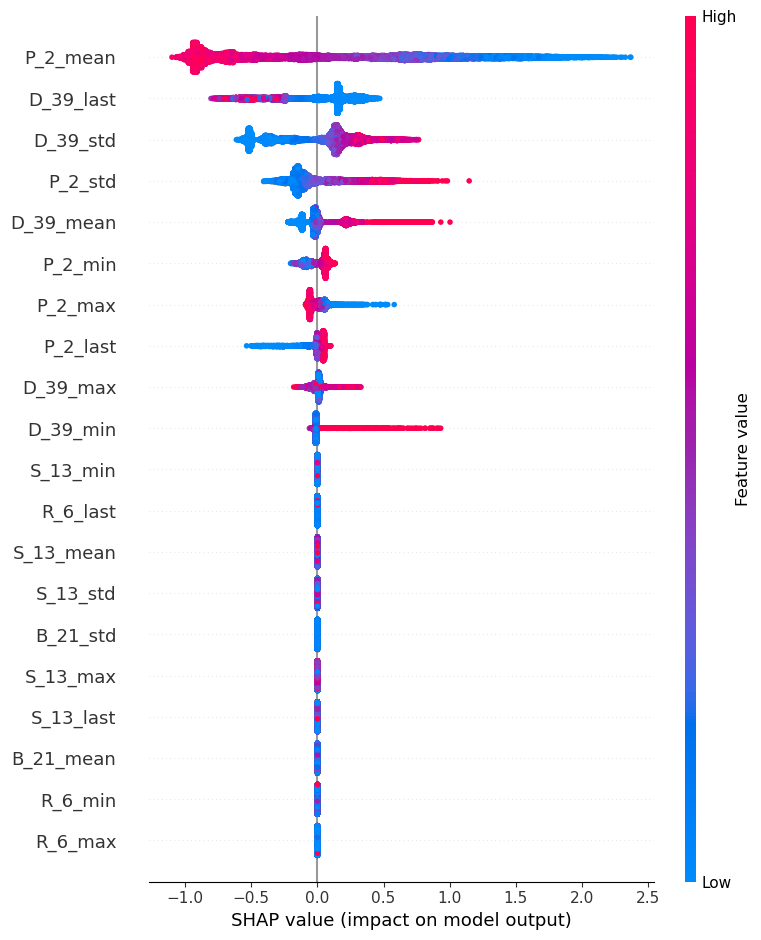

In [111]:
explainer = shap.Explainer(xgb_model, X_test2)
shap_values = explainer(X_test2)
shap.summary_plot(shap_values, X_test2, feature_names=X_test2.columns)

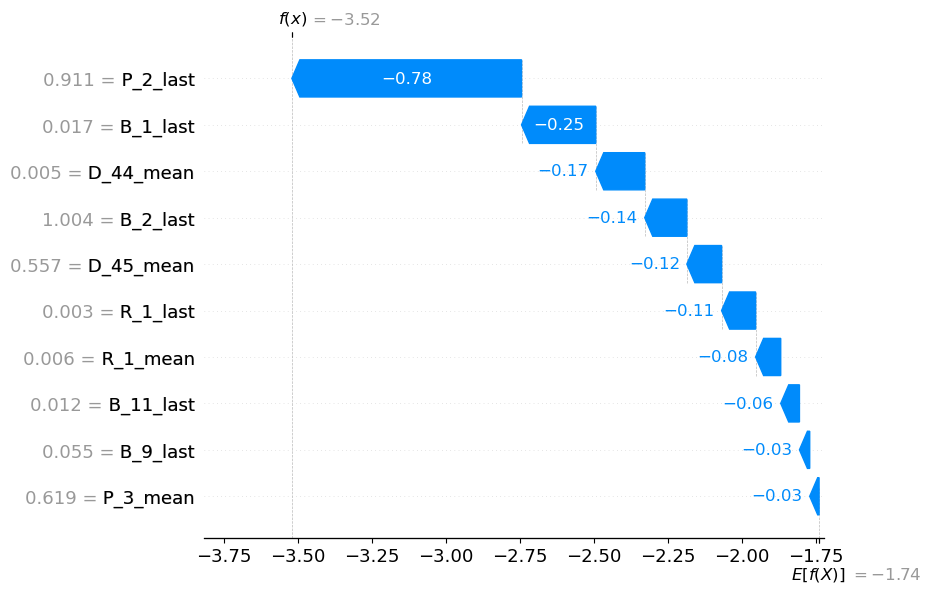

In [73]:
shap.plots.waterfall(shap_values[0])

In [105]:
shap_values[0]

.values =
array([-0.77552761, -0.2506174 , -0.03467043, -0.14214758, -0.06322925,
       -0.11490784, -0.0847832 , -0.16543308, -0.03160998, -0.11736546])

.base_values =
-1.7399914692419025

.data =
array([0.91138566, 0.01681093, 0.05475053, 1.00430852, 0.01217577,
       0.00312714, 0.00575594, 0.00465761, 0.61924148, 0.5565134 ])

In [107]:
explainer.expected_value

-1.7399914692419025

In [108]:
X_test2.iloc[2]

P_2_mean           0.491285
P_2_std            0.049287
P_2_min            0.349322
P_2_max            0.538517
P_2_last           0.537863
                    ...    
D_64_R_last        0.000000
D_64_R_nunique     1.000000
D_64_U_count      13.000000
D_64_U_last        1.000000
D_64_U_nunique     1.000000
Name: 36137, Length: 747, dtype: float64